In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import plotly.graph_objects as go
from poliastro.bodies import Earth
from scipy.integrate import solve_ivp
plt.rcParams['font.family'] = 'Serif'
import sympy as sp
sp.init_printing()

# 3.1 Introduction

Obtaining position as a function of time is easy for circular orbits. For elliptical, parabolic and hyperbolic paths, we are led to the different forms of Kepler's equation relating position aand time. These equations must be solved using numerical methods, which is shown in this chapter. Moreover, the different forms of Kepler's equations are combined into a single universal Kepler's equation by intoducing universal variables.

# 3.2 Time Since Periapsis

The orbit formula
$$
    r = \frac{p}{1 + e\cos\theta}
$$
gives the position of $m_2$ around $m_1$ as a function of the true anomaly $\theta$. However, in order to determine this position as a function of time, we need to figure out a way to determine the time required to fly between any two true anomalies. The purpose of this section is to establish the formulation that allows us to do that determination.

The one equation which relates time directly to true anomaly is the constancy of the specific angular momentum,
$$
    \dot\theta = \frac{h}{r^2}
$$
Substituting the orbit equation and performing the separation of variables, we get
$$
    \frac{\mu^2}{h^3}dt = \frac{d\theta}{(1 + e\cos\theta)^2}
$$
Integrating both sides of this equation yields,
$$
    \frac{\mu^2}{h^3}(t - t_p) = \int_0^{\theta}\frac{d\upsilon}{(1 + e\cos\upsilon)^2}
$$
where $t_p$ is the integration constant defined to be that time at the periapsis passage. $t_p$ is the sixth constant of motion. It is conveninent to measure time from periapsis passage, so we will eventually set $t_p=0$. Thus, we have
$$
    t = \frac{h^3}{\mu^2}\int_0^{\theta}\frac{d\upsilon}{(1 + e\cos\upsilon)^2}
$$
The specific form of the integral on the RHS depends on whether the value of $e$ belongs to a circle, ellipse, parabola or hyperbola.

# 3.3 Circular Orbits

For circular orbits, $e=0$. Thus, we directly get
$$
    t = \frac{h^3}{\mu^2}\theta
$$
Using the fact that for circles, $r = h^2/\mu$ and the formulation for the time period $T$ as,
$$
    T = \frac{2\pi}{\sqrt\mu}r^{3/2}
$$
we can rewrite the time relation as
$$
    t = \frac{r^{3/2}}{\sqrt\mu}\theta; \ \ \ \theta = \frac{2\pi}{T}t = \omega t
$$

# 3.4 Elliptical Orbits

For $0<e<1$, we find in integral tables that,
$$
    \int_0^{\theta}\frac{d\upsilon}{(1 + e\cos\upsilon)^2} = \frac{1}{(1 - e^2)^{3/2}}\left[2\tan^{-1}\left(\sqrt{\frac{1 - e}{1 + e}}\tan\frac{\theta}{2} \right) - \frac{e\sqrt{1 - e^2}\sin\theta}{1 + e\cos\theta}\right]
$$
Therefore, the time since periapsis becomes,
$$
    \frac{\mu^2}{h^3}t = \frac{1}{(1 - e^2)^{3/2}}\left[2\tan^{-1}\left(\sqrt{\frac{1 - e}{1 + e}}\tan\frac{\theta}{2} \right) - \frac{e\sqrt{1 - e^2}\sin\theta}{1 + e\cos\theta}\right]
$$
or
$$
    M_e = 2\tan^{-1}\left(\sqrt{\frac{1 - e}{1 + e}}\tan\frac{\theta}{2} \right) - \frac{e\sqrt{1 - e^2}\sin\theta}{1 + e\cos\theta}
$$
where, 
$$
    M_e = \frac{\mu^2}{h^3}(1 - e^2)^{3/2}t
$$
is called the mean anomaly.

In [74]:
def Me_calc(th, e):
    return 2*((np.arctan(np.sqrt((1 - e)/(1 + e))*np.tan(th/2)) + np.pi)%np.pi) - e*np.sqrt(1 - e**2)*np.sin(th)/(1 + e*np.cos(th))

In [3]:
theta = np.linspace(0, 2*np.pi, 500)

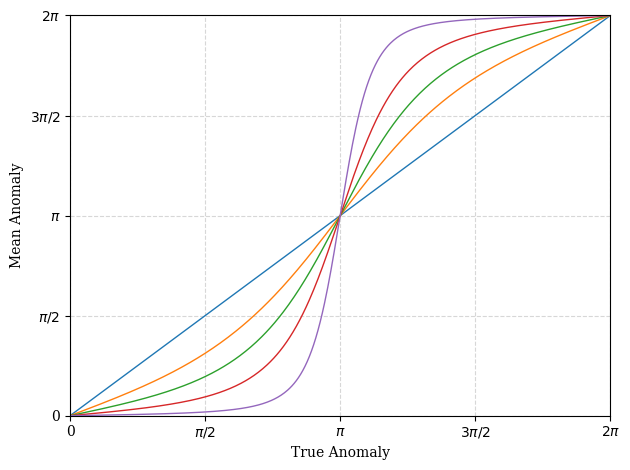

In [4]:
plt.plot(theta[:-1], Me_calc(theta[:-1], 0), lw=1);
plt.plot(theta[:-1], Me_calc(theta[:-1], 0.3), lw=1);
plt.plot(theta[:-1], Me_calc(theta[:-1], 0.5), lw=1);
plt.plot(theta[:-1], Me_calc(theta[:-1], 0.7), lw=1);
plt.plot(theta[:-1], Me_calc(theta[:-1], 0.9), lw=1);
plt.grid(ls='--', alpha=0.5)
plt.xticks([0, np.pi/2, np.pi,  np.pi + np.pi/2,  np.pi + np.pi], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
plt.yticks([0, np.pi/2, np.pi,  np.pi + np.pi/2,  np.pi + np.pi], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
# plt.axis('square')
plt.xlim(0, 2*np.pi)
plt.ylim(0, 2*np.pi)
plt.xlabel('True Anomaly')
plt.ylabel('Mean Anomaly')
plt.tight_layout()

From the above plot, it can be seen that $M_e$ is monotonically increasing with $\theta$ for all values of $e$. From the time period relation of elliptical orbits, we have ${\mu^2}(1 - e^2)^{3/2}/h^3 = 2\pi/T$. Therefore, 
$$
    M_e = \frac{2\pi}{T}t = nt
$$
where $n$ is called the mean motion. Therefore, the mean anomaly $M_e$ is the azimuth position (in radians) of a fictitioous body moving around the ellipse at a constant angular speed $n$.

Let's simplify the relation between the mean anomaly and the true anomaly by introducing an auxiliary angle $E$, called the eccentric anomaly. This is achieved by circumscribing the ellipse in an auxiliary circle with the semi-major axis as its radius, as shown in the image below. The angle subtended at the centre of the circle by the projection of a point $S$ on the auxiliary circle, measured relative to the apse line is the eccentric anomaly.

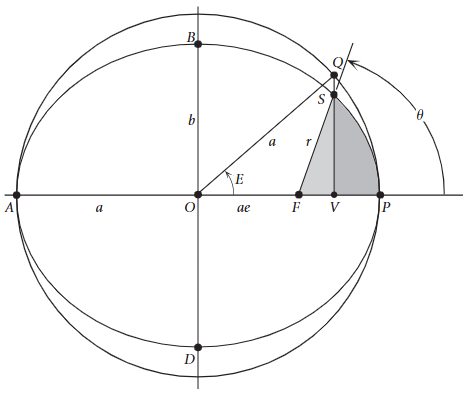

From the above image, we see that the line segment $\overline{OV}$ can be written in terms of the eccentric anomaly as $\overline{OV} = a\cos E$. In terms of the true anomaly, it can be seen that $\overline{OV} = ae + r\cos\theta$. Therefore,
$$
    a\cos E = ae + r\cos\theta = ae + \frac{a(1 - e^2)\cos\theta}{1 + e\cos\theta}
$$
Simplifying it, we get
$$
    \cos E = \frac{e + \cos\theta}{1 + e\cos\theta}
$$
Inverting this for true anomaly, we get
$$
    \cos\theta = \frac{e - \cos E}{e\cos E - 1}
$$
Obtaining $E$ form $\theta$ using the cosine relation is ambiguous as there are two values of $\cos E$ between 1 and -1. Therefore, we use the trigonometric identity
$$
    \tan^2\frac{E}{2} = \frac{1 - \cos E}{1 + \cos E}
$$
we have,
$$
    \tan^2\frac{E}{2} = \frac{1 - e}{1 + e}\frac{1 - \cos\theta}{1 + \cos\theta} = \frac{1 - e}{1 + e}\tan^2\frac{\theta}{2}
$$
Therefore,
$$
    E = 2\tan^{-1}\left(\sqrt{\frac{1 - e}{1 + e}}\tan\frac{\theta}{2} \right); \ \ \ \sin E = \frac{\sqrt{1 - e^2}\sin\theta}{1 + e\cos\theta}
$$

This gives the Kepler's equation as
$$
    M_e = E - e\sin E
$$


In [40]:
mu = Earth.k.to(u.km**3/u.s**2)

r_a = 21000 * u.km
r_p = 9600 * u.km
a = (r_p + r_a)/2
e = (r_a - r_p)/(r_a + r_p)
theta = 120*u.deg

E = 2*(np.arctan(np.sqrt((1 - e)/(1 + e))*np.tan(theta/2)) + np.pi*u.rad)%(np.pi*u.rad)
M_e = E - (e*np.sin(E))*u.rad
T = 2*np.pi/np.sqrt(mu)*a**(3/2)

t = (T*M_e/(2*np.pi*u.rad)).to(u.h)
t.round(3)

<Quantity 1.133 h>

In [80]:
t = (3*u.h).to(u.s)
M_e = 2*np.pi/T*t
E = 2
while abs(E - e*np.sin(E*u.rad) - M_e) > 1e-8:
    err = E - e*np.sin(E*u.rad) - M_e
    E = E - 0.01*err

E = E*u.rad
theta = 2*((np.arctan(np.sqrt((1 + e)/(1 - e))*np.tan(E/2)) + np.pi*u.rad)%(np.pi*u.rad)).to(u.deg)
theta.round(2)

<Quantity 193.16 deg>

In [88]:
RE = Earth.R.to(u.km)
mu = Earth.k.to(u.km**3/u.s**2)

z_a = 5000*u.km
z_p = 500*u.km
r_a = RE + z_a
r_p = RE + z_p
e = (r_a - r_p)/(r_a + r_p)
a = 0.5*(r_a + r_p)
p = a*(1 - e**2)
T = (2*np.pi/np.sqrt(mu)*a**(3/2)).to(u.h)

B = -p/RE
A = e
C = -1

theta_b = (np.arctan2(B, A) + np.arccos(C/A*np.cos(np.arctan2(B, A)))).to(u.deg)
E_b = 2*np.arctan(np.sqrt((1 - e)/(1 + e))*np.tan(theta_b/2)).to(u.deg)
theta_c = (np.arctan2(B, A) - np.arccos(C/A*np.cos(np.arctan2(B, A)))).to(u.deg) + 360*u.deg
E_c = 2*np.arctan(np.sqrt((1 - e)/(1 + e))*np.tan(theta_c/2)).to(u.deg)

Me_b = E_b.to(u.rad) - e*np.sin(E_b)*u.rad
t_b = T/(2*np.pi*u.rad)*Me_b
t_b.to(u.min)*2


<Quantity 28.89327448 min>

In [94]:
Me_c = E_c.to(u.rad) - e*np.sin(E_c)*u.rad
t_c = T/(2*np.pi*u.rad)*Me_c
(T - 2*t_c).to(u.min)

<Quantity 45.25903843 min>

We observe that there is no closed form solution to Kepler's equation $M_e = E - e\sin E$. However, the value of $E$ can be approximated using infinite series. In this section, we will cover the Lagrange Series.

### Lagrange Series
The Lagrange series is a power series in eccentricity $e$, given by
$$
    E = M_e + \sum_{n=1}^{\infty}a_ne^n
$$
where the coefficients $a_n$ are given by,
$$
    a_n = \frac{1}{2^{n - 1}}\sum_{k=0}^{floor(n/2)}(-1)^k\frac{1}{(n-k)!k!}(n - 2k)^{n - 1}\sin[(n - 2k)M_e]
$$
In practical scenarios, we often use a truncated Lagrange Series. If $e$ is small, the truncated Lagrange Series converges. However, Laplace found out that to ensure convergence for any value of $e$, the number of terms $n$ should satisfy 
$$
    n > \frac{1}{1 - e}
$$
So for $e > 0.662743419$, the series starts diverging if more terms are added until reaching the peak at $n \approx 1/(1 - e)$. To ensure convergence, many more terms are required. To tackle this problem, another form of the Lagrange Series using the *Bessel functions of the first kind* $J_n$ was formulated, which is given as
$$
    E = M_e + \sum_{n = 1}^{\infty}\frac{2}{n}J_n(ne)\sin(nM_e)
$$
where the coefficients $J_n$ are given by,
$$
    J_n(x) = \sum_{k=0}^{\infty}\frac{(-1)^k}{k!(n + k)!}\left(\frac{x}{2}\right)^{n + 2k}
$$

We can combine the relation between the true anomaly and the eccentric anomaly in the orbit equation as follows:
$$
    r = \dfrac{p}{1 + e\cos\theta} = \dfrac{p}{1 + e\left(\dfrac{e - \cos E}{e\cos E - 1}\right)}
$$
This simplifies to a very simple result:
$$
    r = a(1 - e\cos E)
$$
Now, let's compute the time-averaged radius of the elliptical orbit $\bar r_t$ as,
$$
    \bar r_t = \frac{1}{T}\int_0^Trdt
$$
From the time since periapsis equation, we have
$$
    t = \frac{T}{2\pi}(E - e\sin E)
$$
Taking the derivative on both sides
$$  
    dt = \frac{T}{2\pi}(1 - e\cos E)dE
$$
Therefore,
$$
    \begin{align*}
        \bar r_t &= \frac{a}{2\pi}\int_0^{2\pi}(1 - e\cos E)^2 dE\\
                 &= \frac{a}{2\pi}\int_0^{2\pi}(1 + e^2\cos^2 E - 2e\cos E) dE\\
                 &= \frac{a}{2\pi}(2\pi + e^2\pi - 0)\\
        \bar r_t &= a\left(1 + \frac{e^2}{2}\right)

    \end{align*}
$$

Comparing this with the true anomaly averaged radius $\bar r_{\theta}$, we come to the conclusion that $\bar r_t > \bar r_{\theta}$. In fact, we have precisely
$$
    \bar r_{\theta} = a\sqrt{3 - 2\frac{\bar r_t}{a}}
$$

# 3.5 Parabolic Trajectories

For parabola, $e = 1$. This gives,
$$
    \frac{\mu^2}{h^3}t = M_p = \int_0^{\theta}\frac{d\upsilon}{(1 + \cos\upsilon)^2}d\upsilon
$$
The solution of this integral is straightforward, given by
$$
    M_p = \frac{1}{2}\tan\frac{\theta}{2} + \frac{1}{6}\tan^3\frac{\theta}{2}
$$
For a given $\theta$, $M_p$ can be easily calculated. However, for a given time $t$, we need to solve the cubic equation
$$
    \frac{1}{6}\tan^3\frac{\theta}{2} + \frac{1}{2}\tan\frac{\theta}{2} - M_p = 0
$$
which has only one solution, given by
$$
    \tan\frac{\theta}{2} = 2\sinh\left(\frac{1}{3}\sinh^{-1}(3M)\right)
$$
or in the exponential form,
$$
    \tan\frac{\theta}{2} = \left(3M_p + \sqrt{9M_p^2 + 1}\right)^{1/3} - \left(3M_p + \sqrt{9M_p^2 + 1}\right)^{-1/3}
$$

In [113]:
mu = Earth.k.to(u.km**3/u.s**2)
v_p = 10*u.km/u.s
r_p = 2*mu/v_p**2
p = 2*r_p
h = np.sqrt(mu*p)
t = 6*u.h

M_p = mu**2/h**3*t.to(u.s)
theta = 2*np.arctan((3*M_p + np.sqrt(9*M_p**2 + 1))**(1/3) - (3*M_p + np.sqrt(9*M_p**2 + 1))**(-1/3)).to(u.deg)
r = p/(1 + np.cos(theta))
r


<Quantity 86976.64979102 km>

# 3.6 Hyperbolic Trajectories

For hyperbola, $e > 1$. The integral becomes,

$$
    \frac{\mu^2}{h^3}t = \frac{1}{e^{2} - 1} \left[\frac{ e \sin \theta }{1 + e \cos \theta} - \frac{1}{\sqrt{e^{2} - 1}} \ln \left( \frac{\sqrt{e + 1} + \sqrt{e - 1} \tan(\theta/2)}{\sqrt{e + 1} - \sqrt{e - 1} \tan(\theta/2)} \right) \right]
$$
Multyplying both sides by $(e^2 - 1)^{3/2}$, we get
$$
    M_h = \frac{ e\sqrt{e^2 - 1} \sin \theta }{1 + e \cos \theta} -  \ln \left( \frac{\sqrt{e + 1} + \sqrt{e - 1} \tan(\theta/2)}{\sqrt{e + 1} - \sqrt{e - 1} \tan(\theta/2)} \right)
$$
where 
$$
    M_h = \frac{\mu^2}{h^3}(e^2 - 1)^{3/2}t
$$

The above equation can be simlified by introducing a hyperbolic eccentric angle $F$. 

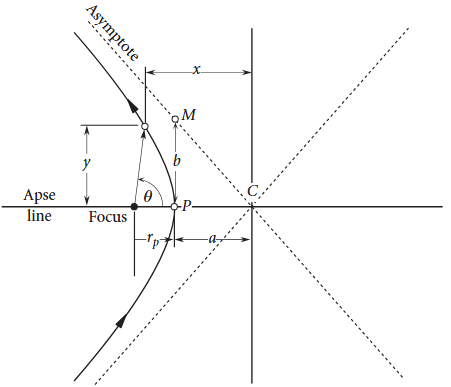

In the above image, consider a point with its polar coordinates $(r, \theta)$. Let $x$ be its distance from the y-axis and $y$ be the distance above the apse line. We define the hyperbolic sine of the dimensionless variable $F$ as the ratio $y/b$ as,
$$
    \sinh F = \frac{y}{b}
$$
Using the cartesian equation of the ellipse and the identities of the hyperbolic sines and cosines, we can derive that
$$
    \cosh F = \frac{x}{a}
$$
Since $y = r\sin\theta$ and $b = a\sqrt{e^2 - 1}$, we have
$$
    \sinh F = \frac{r\sin\theta}{b} = \frac{1}{a \sqrt{e^{2} - 1}} \frac{a(e^{2} - 1)}{1 + e \cos \theta} \sin \theta = \frac{a(e^{2} - 1) \sin \theta}{a \sqrt{e^{2} - 1} (1 + e \cos \theta)} =  \frac{\sqrt{e^{2} - 1}\sin \theta}{1 + e \cos \theta}
$$
This gives 
$$
    F = \sinh^{-1}\left(\frac{\sqrt{e^{2} - 1}\sin \theta}{1 + e \cos \theta}\right)
$$
Using the identity $\sinh^{-1}(x) = \ln(x + \sqrt{x^2 + 1})$, we get
$$
    \begin{align*}
        F &= \ln\left(\frac{\sqrt{e^{2} - 1}\sin \theta}{1 + e \cos \theta} + \sqrt{\frac{(e^{2} - 1)\sin^2 \theta}{(1 + e \cos \theta)^2} + 1}\right) \\
          &= \ln\left(\frac{\sqrt{e^{2} - 1}\sin \theta}{1 + e \cos \theta} + \sqrt{\frac{e^2\sin^2\theta - \sin^2 \theta + 1 + e^2 \cos^2 \theta + 2\cos\theta}{(1 + e \cos \theta)^2}}\right) \\
          &= \ln\left(\frac{\sqrt{e^{2} - 1}\sin \theta}{1 + e \cos \theta} + \sqrt{\frac{ \cos^2\theta + e^2 + 2\cos\theta}{(1 + e \cos \theta)^2}}\right) \\
          &= \ln\left(\frac{\sqrt{e^{2} - 1}\sin \theta + e + \cos\theta}{1 + e \cos \theta}\right) \\
    \end{align*}
$$
Using the identities $\sin\theta = \dfrac{2\tan(\theta/2)}{1 + \tan^2(\theta/2)}$ and $\cos\theta = \dfrac{1 - \tan^2(\theta/2)}{1 + \tan^2(\theta/2)}$, we have
$$
    \begin{align*}
        F &= \ln \left[ \frac{1 + e + (e - 1) \tan^{2}(\theta/2) + 2 \tan(\theta/2) \sqrt{e^{2} - 1}}{1 + e + (1 - e) \tan^{2}(\theta/2)} \right] \\
          &= \ln \left[ \frac{(\sqrt{e + 1} + \sqrt{e - 1}\tan(\theta/2))^2}{(\sqrt{e + 1} + \sqrt{e - 1}\tan(\theta/2))(\sqrt{e + 1} - \sqrt{e - 1}\tan(\theta/2))} \right] \\
          &= \ln \left[ \frac{\sqrt{e + 1} + \sqrt{e - 1}\tan(\theta/2)}{\sqrt{e + 1} - \sqrt{e - 1}\tan(\theta/2)} \right] \\
    \end{align*}
$$
Substituting into the mean anomaly relation, we get
$$
    M_h = e\sinh F - F
$$

# 3.7 Universal Variables